In [2]:
from tensorflow.keras.models import load_model
import numpy as np
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt



#### [미션1] 
- [1-1] 개고양이를 구별하는 모델을 불러와서 models에 할당하기
- [1-2] 모델의 전체레이어 갯수 및 파라미터 확인하기
- [1-3] 모델에서 사용된 input사이즈 확인하기

In [3]:
# [1-1] 개고양이를 구별하는 모델을 불러와서 models에 할당하기
model=load_model('./강사제공models/cat_dog_model.h5') 


In [4]:
# [1-2] 모델의 전체레이어 갯수 및 파라미터 확인하기
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 2)                 128300    
                                                                 
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________


In [5]:
# [1-3] 모델에서 사용된 input사이즈 확인하기
model.layers[0].input_shape

(None, 224, 224, 3)

#### [미션2]  개고양이를 구별하여서 폴더배분



In [14]:
class_names = ['cat','dog']
os.mkdir('./동물이미지')

for x in class_names:
    os.mkdir('./동물이미지/' +  x )

In [15]:
modelShape = model.layers[0].input_shape
row = modelShape[1]
col = modelShape[2]
ch = modelShape[3]

1/1 [==============================] - 0s 45ms/step


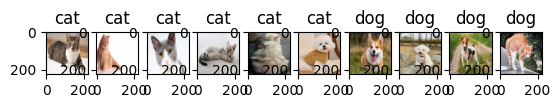

In [16]:
import shutil
model=load_model('./강사제공models/cat_dog_model.h5') 
imgList=glob('./cat_dog_img/*.jpg')

for cnt,x in enumerate(imgList[:10]):
    if ch==3:
        img = Image.open(x)
    elif ch==1:
        img=Image.open(x).convert('L')
    img=img.resize((224,224))
    imgArr=np.array(img)/255
    inputimage=imgArr.reshape(1,224,224,3)
    predictNum=model.predict(inputimage)  # 1-1에서 모델제작할때 
    num=np.argmax(predictNum)  #3번값이 제일큼

    plt.subplot(1,10,cnt+1)
    plt.imshow(imgArr, cmap='gray')
    plt.title(class_names[num])

    imgName=x.split('\\')[-1]
    sourceFileName='./cat_dog_img/' + imgName
    targetFileName='./동물이미지/' + class_names[num] + '/' + imgName
    shutil.move(sourceFileName,targetFileName)
        
plt.show()